# Predictive Modeling of Stock Data
By Shahbab Ahmed, Isaiah Erven, Amirul Miah, and Tanbirul Miah

Created for SI 370

In [187]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis

In [129]:
def create_stock_df(stock):
    with open('Stocks/' + stock + ".us.txt") as f:
        lines = f.readlines()
        stock_data = pd.DataFrame(lines)
        f.close()
        
    
    stock_dict = {"Date":[], "Open":[], "High":[], "Low":[], "Close":[], "Volume":[]}
        
    for i in lines[1:]:
        
        #create variables by splitting and slicing data
        Date = i.split(",")[:][0]
        Open = i.split(",")[:][1]
        High = i.split(",")[:][2]
        Low = i.split(",")[:][3]
        Close = i.split(",")[:][4]
        Volume = i.split(",")[:][5]
        OpenInt = i.split(",")[:][6]
        
        #appending data to stock_dict keys
        stock_dict["Date"].append(Date)
        stock_dict["Open"].append(Open)
        stock_dict["High"].append(High)
        stock_dict["Low"].append(Low)
        stock_dict["Close"].append(Close)
        stock_dict["Volume"].append(Volume)
        
    stock_df = pd.DataFrame(stock_dict)
    stock_df = stock_df.set_index("Date")
    
    #adds average of open,high,low,and close
    stock_df["Average Price"] = stock_df.iloc[:,:3].astype(float).mean(axis=1)
    return stock_df

In [130]:
create_stock_df("a")

,Open,High,Low,Close,Volume,Average Price
Date,,,,,,
1999-11-18,30.713,33.754,27.002,29.702,66277506,30.489667
1999-11-19,28.986,29.027,26.872,27.257,16142920,28.295000
1999-11-22,27.886,29.702,27.044,29.702,6970266,28.210667
1999-11-23,28.688,29.446,27.002,27.002,6332082,28.378667
1999-11-24,27.083,28.309,27.002,27.717,5132147,27.464667
...,...,...,...,...,...,...
2017-11-06,68.22,68.45,68.22,68.22,995731,68.296667
2017-11-07,68.32,68.64,68.04,68.25,966466,68.333333
2017-11-08,68.1,68.33,67.771,68.11,972616,68.067000


# Technical Indicators

In [131]:
import pandas as pd
import numpy as np
import talib

"""
TA Functions
Parameters
----------
df : DataFrame
timeperiod : int
    The last x amount of days

Returns
-------
Copy of dataframe we passed in plus a new column containing the respective indicator we called
"""

def add_ATR(df, timeperiod=1):
    temp = df.copy()
    temp['ATR_{}'.format(timeperiod)] = talib.ATR(df.iloc[:, 0], df.iloc[:, 0], df.iloc[:, 0], timeperiod=timeperiod)
    return temp

def add_RSI(df, timeperiod=1):
    temp = df.copy()
    temp['RSI_{}'.format(timeperiod)] = talib.RSI(df.iloc[:, 0], timeperiod=timeperiod)
    return temp

def add_SMA(df, timeperiod=1):

    temp = df.copy()
    temp['SMA_{}'.format(timeperiod)] = talib.SMA(df.iloc[:, 0], timeperiod)
    return temp

def add_EMA(df, timeperiod=1):

    temp = df.copy()
    temp['EMA_{}'.format(timeperiod)] = talib.EMA(df.iloc[:, 0], timeperiod)
    return temp

def add_OBV(df):
    
    temp = df.copy()
    temp['OBV'] = talib.OBV(df.iloc[:, 0], df["Volume"])
    return temp

In [132]:
stock_df = create_stock_df("a")

In [133]:
stock_df

,Open,High,Low,Close,Volume,Average Price
Date,,,,,,
1999-11-18,30.713,33.754,27.002,29.702,66277506,30.489667
1999-11-19,28.986,29.027,26.872,27.257,16142920,28.295000
1999-11-22,27.886,29.702,27.044,29.702,6970266,28.210667
1999-11-23,28.688,29.446,27.002,27.002,6332082,28.378667
1999-11-24,27.083,28.309,27.002,27.717,5132147,27.464667
...,...,...,...,...,...,...
2017-11-06,68.22,68.45,68.22,68.22,995731,68.296667
2017-11-07,68.32,68.64,68.04,68.25,966466,68.333333
2017-11-08,68.1,68.33,67.771,68.11,972616,68.067000


In [134]:
def add_ta(df, timeperiod):
    df = add_ATR(df,timeperiod)
    df = add_RSI(df,timeperiod)
    df = add_SMA(df,timeperiod)
    df = add_EMA(df,timeperiod)
    df = add_OBV(df)
    
    return df

In [135]:
stock_df = add_ta(stock_df,2)

In [136]:
stock_df

,Open,High,Low,Close,Volume,Average Price,ATR_2,RSI_2,SMA_2,EMA_2,OBV
Date,,,,,,,,,,,
1999-11-18,30.713,33.754,27.002,29.702,66277506,30.489667,NaN,NaN,NaN,NaN,66277506.0
1999-11-19,28.986,29.027,26.872,27.257,16142920,28.295000,NaN,NaN,29.8495,29.849500,50134586.0
1999-11-22,27.886,29.702,27.044,29.702,6970266,28.210667,1.413500,0.000000,28.4360,28.540500,43164320.0
1999-11-23,28.688,29.446,27.002,27.002,6332082,28.378667,1.107750,36.199503,28.2870,28.638833,49496402.0
1999-11-24,27.083,28.309,27.002,27.717,5132147,27.464667,1.356375,14.782048,27.8855,27.601611,44364255.0
...,...,...,...,...,...,...,...,...,...,...,...
2017-11-06,68.22,68.45,68.22,68.22,995731,68.296667,0.141770,80.339366,68.1550,68.173099,644836243.0
2017-11-07,68.32,68.64,68.04,68.25,966466,68.333333,0.120885,88.471315,68.2700,68.271033,645802709.0
2017-11-08,68.1,68.33,67.771,68.11,972616,68.067000,0.170443,31.373813,68.2100,68.157011,644830093.0


# Train/Test Split

In [137]:
stock_df = stock_df.dropna()
#features
X = stock_df.drop(columns=["Average Price"])
#target
y = stock_df[["Average Price"]]

In [138]:
from sklearn.model_selection import train_test_split

#set shuffle=False since we're working with timeseries and should not randomize dates for stock data
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, shuffle=False)

# Principal Components Analysis

In [139]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


y_standardized = pd.DataFrame(scaler.fit_transform(X.dropna()), columns=X.columns)
y_standardized

,Open,High,Low,Close,Volume,ATR_2,RSI_2,SMA_2,EMA_2,OBV
0,0.002363,0.108744,-0.032149,0.141429,1.200534,1.353392,-1.661067,0.045246,0.053346,-0.872683
1,0.064331,0.089316,-0.035453,-0.067133,0.944569,0.908858,-0.515705,0.033719,0.060957,-0.847031
2,-0.059682,0.003031,-0.035453,-0.011903,0.463296,1.270337,-1.193359,0.002656,-0.019320,-0.867822
3,-0.020198,-0.019508,0.004427,-0.004950,-0.860080,0.655786,-0.455522,-0.039663,-0.019713,-0.860397
4,-0.013863,0.028909,-0.005720,0.043328,0.136687,0.036647,-0.297407,-0.016724,-0.015613,-0.842905
...,...,...,...,...,...,...,...,...,...,...
4514,3.118827,3.049277,3.206705,3.116760,-1.195747,-0.495592,0.880891,3.118167,3.120780,1.564743
4515,3.126554,3.063696,3.192547,3.119077,-1.207485,-0.525957,1.138188,3.127064,3.128360,1.568658
4516,3.109555,3.040171,3.171388,3.108263,-1.205018,-0.453905,-0.668391,3.122422,3.119535,1.564718
4517,3.095648,3.013610,3.103662,3.058826,-0.924073,-0.446957,-1.178265,3.106948,3.107305,1.557940


In [140]:
from sklearn.decomposition import PCA
pca = PCA()

pc_scores = pca.fit_transform(y_standardized)
pc_scores = pd.DataFrame(pc_scores, columns=['PC' + str(i) for i in np.arange(1, y_standardized.shape[1] + 1)])
pc_scores.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-0.054963,2.414363,-0.953155,-0.183120,-0.206826,0.102113,0.009241,-0.050313,0.034009,-0.015579
1,-0.122447,1.606172,-0.026616,0.022335,-0.341491,-0.071316,0.052638,0.054208,-0.029889,-0.009184
2,-0.150172,1.806346,-0.751948,0.395853,0.011454,0.022241,-0.041649,-0.025505,-0.019841,0.000487
3,-0.087073,0.435636,-0.562025,1.266056,0.024317,0.022459,-0.051982,0.017403,0.003517,-0.011349
4,-0.226243,0.487344,-0.202670,0.343661,-0.609670,0.052564,-0.006253,-0.004073,0.006580,0.000691


Text(0.5, 1.0, 'Scree plot')

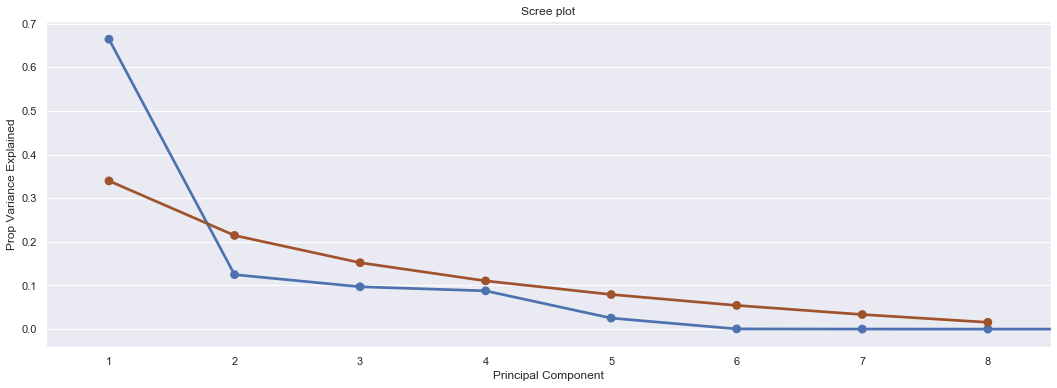

In [141]:
sns.set(rc={"figure.figsize":(8, 4)})

scree_data = pd.DataFrame({'Principal Component': ['1', '2', '3', '4', '5', '6', '7', '8', '9','10'], 'Prop Variance Explained': pca.explained_variance_ratio_})
sns.set(rc={"figure.figsize":(18, 6)})
sns.pointplot(x='Principal Component', y='Prop Variance Explained', data=scree_data).set_title('Scree plot')

l = []
for i in range(8):
    l.append(1/(i+1))
    
sns.pointplot(x='Principal Component', y='Prop Variance Explained', color='#a0522d', data=pd.DataFrame([{'Principal Component':(i + 1), 'Prop Variance Explained': (np.sum(l[i:8]) / 8)} for i in range(8)])).set_title('Scree plot')

Text(0.5, 1.0, 'Loadings on PC 3')

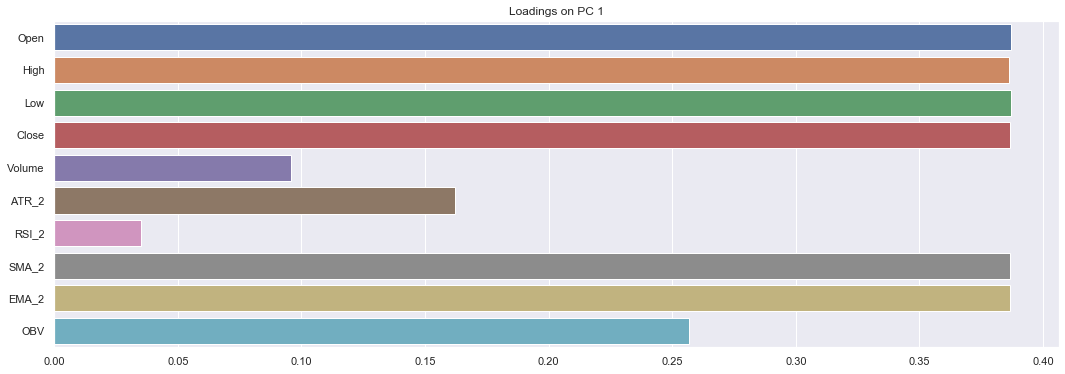

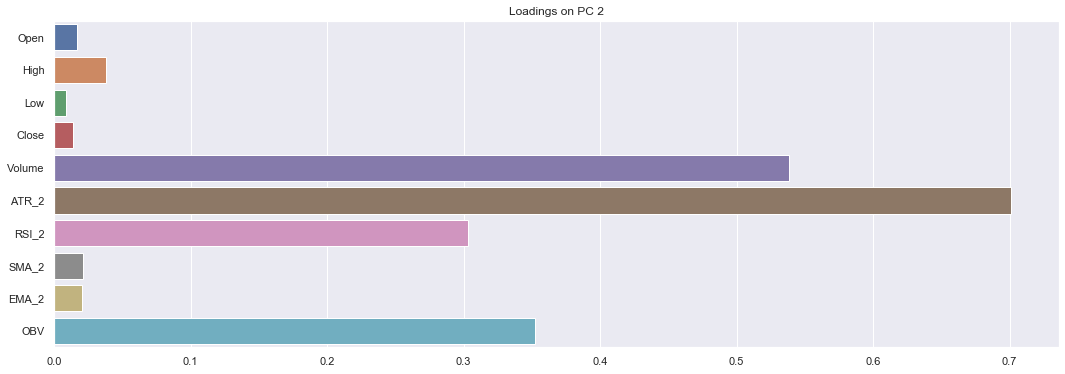

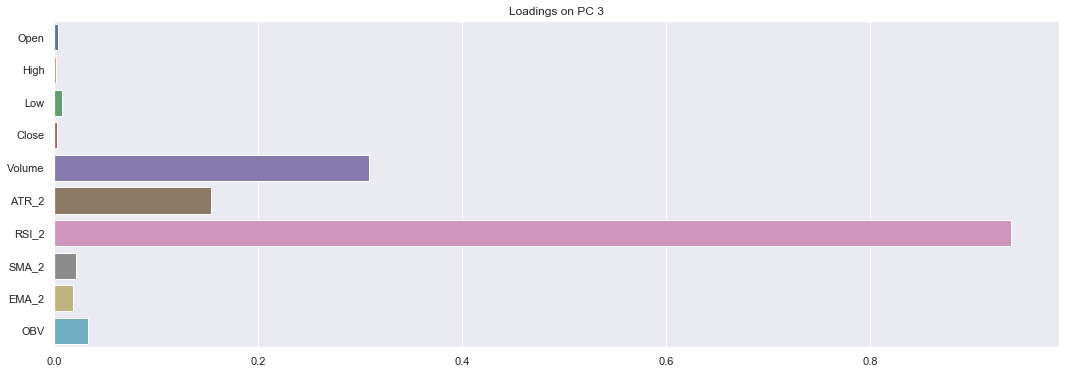

In [142]:
plt.figure(1)
sns.barplot(x=np.abs(pca.components_[0,:]), y=X.columns, orient='h').set_title('Loadings on PC 1')

plt.figure(2)
sns.barplot(x=np.abs(pca.components_[1,:]), y=X.columns, orient='h').set_title('Loadings on PC 2')

plt.figure(3)
sns.barplot(x=np.abs(pca.components_[2,:]), y=X.columns, orient='h').set_title('Loadings on PC 3')

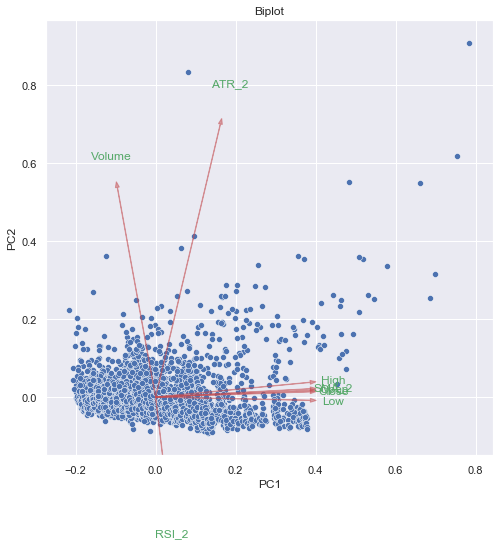

In [143]:
scale1 = 1.0/(pc_scores.PC1.max()-pc_scores.PC1.min())
scale2 = 1.0/(pc_scores.PC2.max()-pc_scores.PC2.min())

plt.figure(figsize=(8, 8))
sns.scatterplot(x=pc_scores.PC1*scale1, y=pc_scores.PC2*scale2).set_title('Biplot')

# adding the coefficients: 
for i in range(8):
    plt.arrow(0, 0, pca.components_[0,i], pca.components_[1,i], color = 'r',alpha = 0.5, head_width=0.01)
    plt.text(pca.components_[0,i]*1.15, pca.components_[1,i]*1.15, X.columns[i], color = 'g', ha = 'center', va = 'center')

In [144]:
pca.explained_variance_ratio_

array([6.64380897e-01, 1.24851978e-01, 9.70389981e-02, 8.77160167e-02,
       2.52589462e-02, 5.19589688e-04, 1.40488327e-04, 6.72848958e-05,
       2.11841220e-05, 4.61722369e-06])

# Multiple Linear Regression

In [145]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(x_train, y_train) 

# The following section will get results by interpreting the created instance: 

# Obtain the coefficient of determination by calling the model with the score() function, then print the coefficient:
r_sq = model.score(x_train, y_train)
print('coefficient of determination:', r_sq)

# Print the Intercept:
print('intercept:', model.intercept_)

# Print the Slope:
print('slope:', model.coef_) 

# Predict a Response and print it:
y_pred = model.predict(x_test)

coefficient of determination: 1.0
intercept: [-2.20540137e-08]
slope: [[ 3.33333334e-01  3.33333328e-01  3.33333338e-01  1.38402429e-09
   3.31446608e-16  5.08103712e-11  7.08248565e-14 -6.87919603e-10
   2.66431046e-10 -2.14249562e-17]]


In [105]:
y_pred

array([[36.53766667],
       [36.40266667],
       [36.95633334],
       [37.34233334],
       [37.68633334],
       [37.93733334],
       [37.88900001],
       [38.04700001],
       [37.87766667],
       [37.42433334],
       [36.55166667],
       [36.94433334],
       [37.39466667],
       [37.64933334],
       [37.64100001],
       [37.97466668],
       [37.86766668],
       [38.17366667],
       [38.13833334],
       [38.59133334],
       [39.13000001],
       [38.95900001],
       [37.861     ],
       [37.61733334],
       [37.93766668],
       [37.75600001],
       [37.78233334],
       [38.11466668],
       [38.44833334],
       [38.85966668],
       [39.11600001],
       [39.40466668],
       [39.17833334],
       [39.18366668],
       [39.33433334],
       [39.46133334],
       [39.95833334],
       [40.56200001],
       [40.80233335],
       [40.73600001],
       [40.45633334],
       [40.53066668],
       [40.41200001],
       [40.41200001],
       [40.42966668],
       [40

In [175]:
y_test

,Average Price
Date,
2014-04-14,36.537667
2014-04-15,36.402667
2014-04-16,36.956333
2014-04-17,37.342333
2014-04-21,37.686333
...,...
2017-11-06,68.296667
2017-11-07,68.333333
2017-11-08,68.067000


In [171]:
predictions = []

for i in y_pred:
    predictions.append(i[0])

Text(12.085, 0.5, 'predicted price')

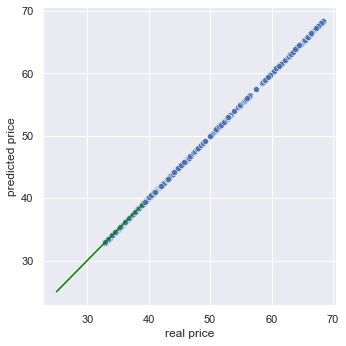

In [172]:
sns.set(rc={"figure.figsize":(10, 6)})

sns.relplot(x=y_test["Average Price"].values, y=predictions)
plt.plot(np.arange(25, 40), np.arange(25, 40), color='green')
plt.xlabel('real price')
plt.ylabel('predicted price')

In [173]:
from sklearn import metrics

print("r2:", metrics.r2_score(y_true=y_test["Average Price"].values, y_pred=predictions))
print("MSE:", metrics.mean_squared_error(y_true=y_test["Average Price"].values, y_pred=predictions))
print("MAE:", metrics.mean_absolute_error(y_true=y_test["Average Price"].values, y_pred=predictions))

r2: 1.0
MSE: 3.5395649267857353e-16
MAE: 1.610272007770262e-08


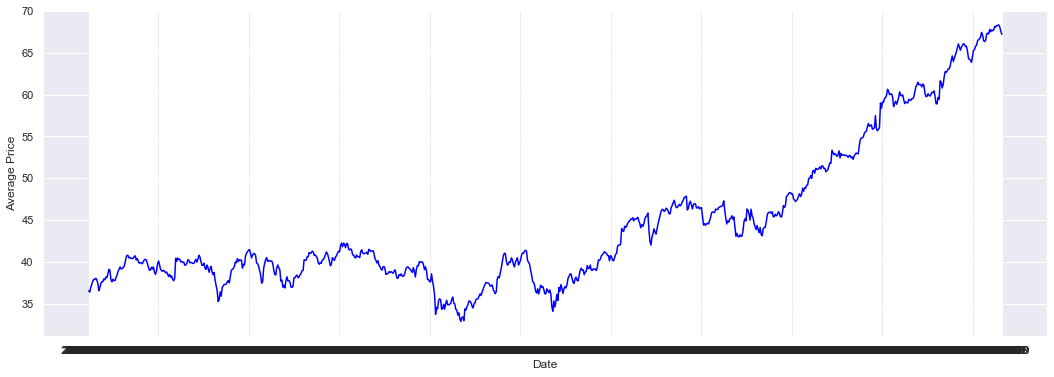

In [179]:
test = y_test.reset_index()
sns.set(rc={"figure.figsize":(18, 6)})
sns.lineplot(data=test.sort_values(by='Date'), x='Date', y=test["Average Price"], color='blue')

# Decision Trees

In [181]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [198]:
stock_df["percent_change"] = stock_df["Average Price"].pct_change() * 100
stock_df["Direction"] = [1 if i > 0 else 0 for i in stock_df["percent_change"]]
stock_df.dropna(inplace=True)

In [252]:
stock_df.drop(columns=["percent_change"], inplace=True)

In [253]:
dt_X = stock_df.drop(columns=["Direction"])
dt_Y = stock_df[["Direction"]]

In [254]:
depths = np.arange(2,10) # define the depths
results = [] # create an empty data frame for our results

for depth in depths:
    best_depth_tree = DecisionTreeClassifier(max_depth = depth) # creating an instance of a decision tree
    results.append(cross_val_score(best_depth_tree, dt_X, dt_Y, scoring="roc_auc", cv=3).mean())
    
max_depth_dt = pd.DataFrame({'depths':depths, 'mean_roc_auc':results})
max_depth_dt = max_depth_dt.sort_values("mean_roc_auc", ascending=False)
best_depth = max_depth_dt["depths"].iloc[0]
print("Best Max depth is ",best_depth)

Best Max depth is  3


In [255]:
max_depth_dt

,depths,mean_roc_auc
1,3,0.813076
0,2,0.805178
2,4,0.781354
3,5,0.760954
4,6,0.737692
5,7,0.717762
6,8,0.692708
7,9,0.663649


In [256]:
X_train, X_test, y_train, y_test = train_test_split(dt_X,dt_Y,test_size=0.2, shuffle=False)
tree = DecisionTreeClassifier(max_depth=best_depth)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [257]:
predictions = tree.predict(X_test)
predictions

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,

In [258]:
print(metrics.confusion_matrix(y_test, predictions))

[[293 116]
 [ 96 399]]


In [259]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 0.2345132743362832
Mean Squared Error: 0.2345132743362832
Root Mean Squared Error: 0.48426570633928145


In [260]:
import graphviz
import matplotlib.pyplot as plt
import pydotplus
import matplotlib.image as mpimg
import io
from sklearn.tree import export_graphviz

def draw_tree(tree):
    dot_data = export_graphviz(tree,
                               out_file=None,
                               feature_names=dt_X.columns, 
                               class_names=["Up", "Down"],
                               filled=True,
                               rounded=True,
                               special_characters=True,
                               proportion = True)
    
    graph = graphviz.Source(dot_data)
    graph.format = "png"
    graph.render("tree",view=True)
    plt.figure(figsize=(50,30))
    img = mpimg.imread("tree.png")
    imgplot = plt.imshow(img)

    plt.show()
    
#draw_tree(tree)

In [261]:
dict(zip(
    dt_X.columns,
    tree.feature_importances_
))

{'Open': 0.0,
 'High': 0.0,
 'Low': 0.0,
 'Close': 0.0,
 'Volume': 0.0,
 'Average Price': 0.0,
 'ATR_2': 0.062414445390407455,
 'RSI_2': 0.9304331955245538,
 'SMA_2': 0.007152359085038661,
 'EMA_2': 0.0,
 'OBV': 0.0}

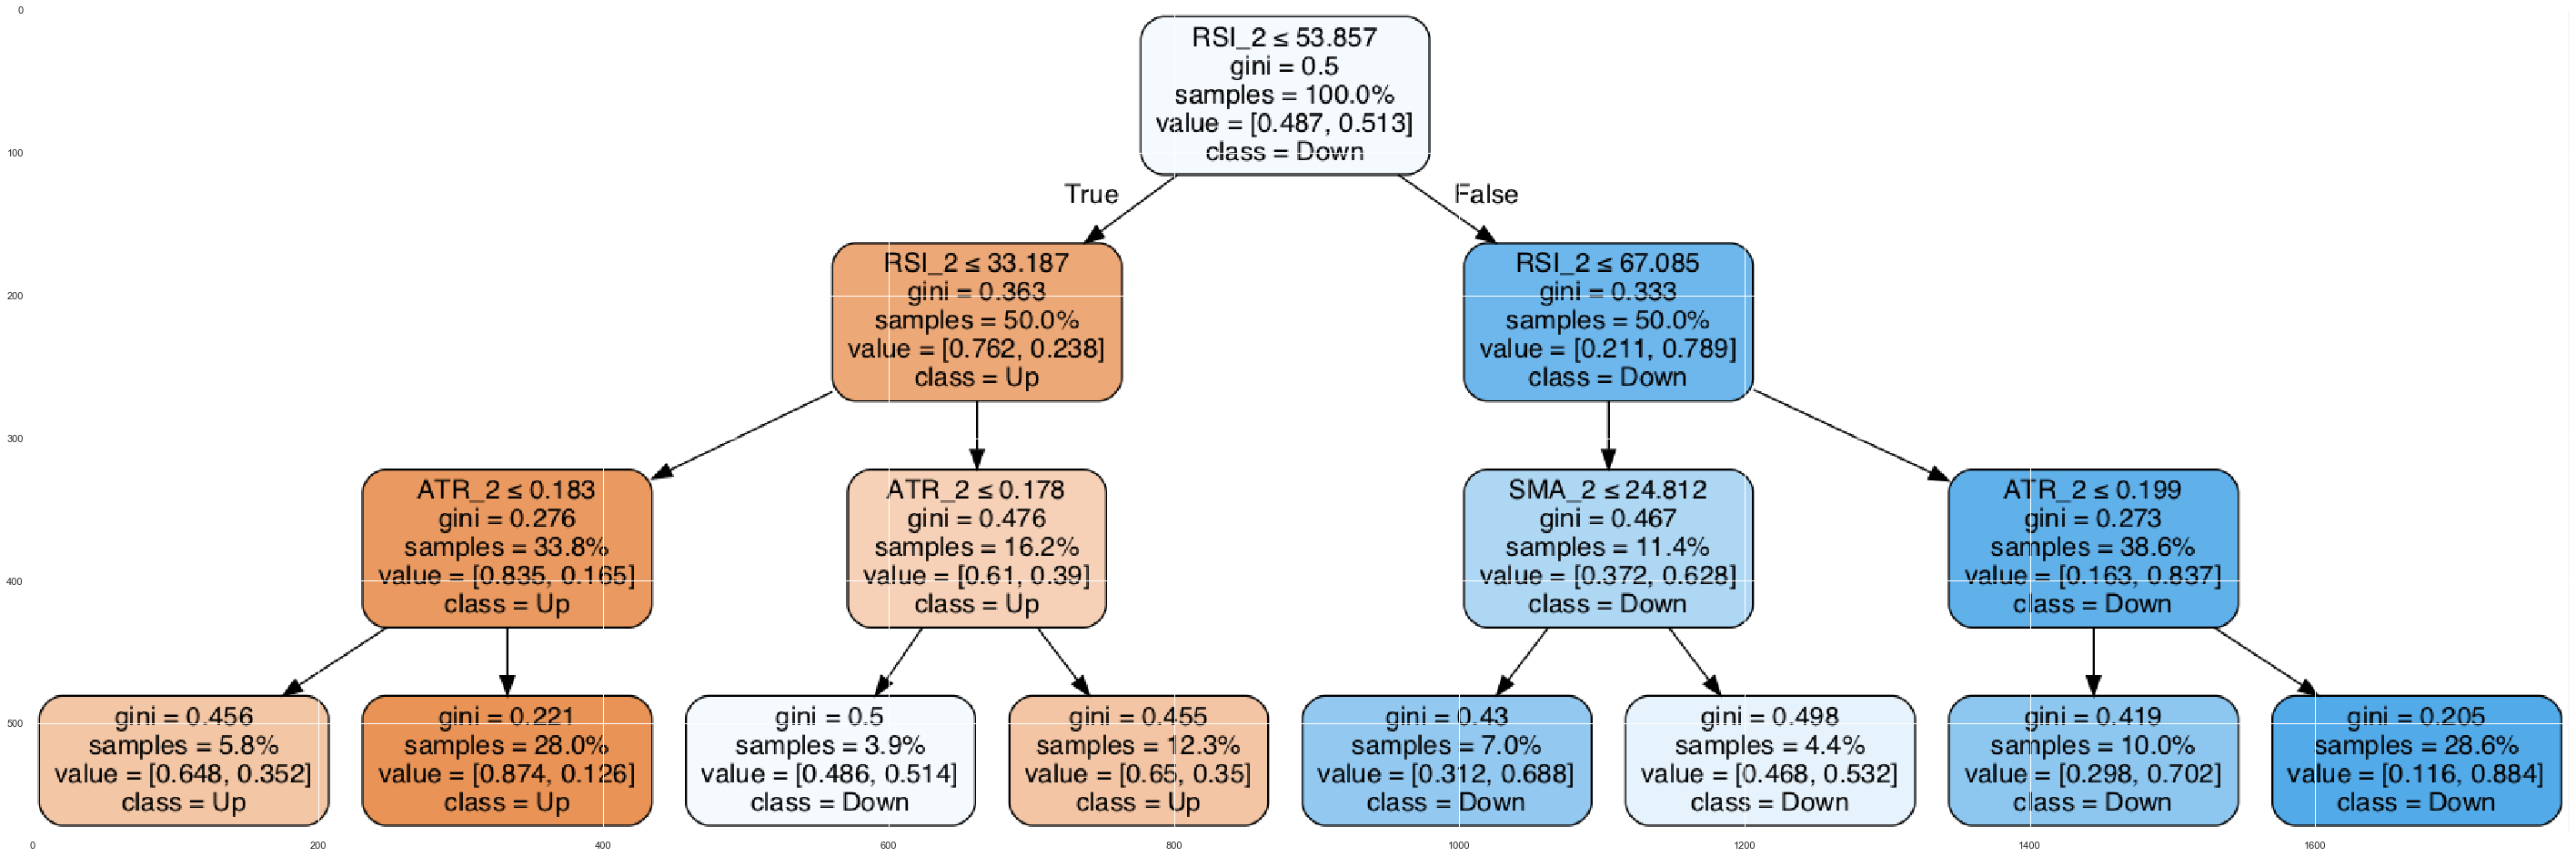

In [262]:
draw_tree(tree)